# 인구 소멸 위기 지역 시각화

인구 소멸 위기 지역??? 65세 이상 노인 인구와 20~39세 여성 인구를 비교해서 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 인구 소멸 위험 지역으로 분류

In [1]:
import pandas as pd

import numpy as np

#한글 글꼴 세팅

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = '/content/malgun.ttf'

from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [2]:
rc('font',family=font_name)

# 데이터 전처리

1. 컬럼 정리

In [3]:
population = pd.read_excel('/content/05. population_raw_data.xlsx',header=1)

population.fillna(method='pad', inplace=True)

population.rename(columns = {'행정구역(동읍면)별(1)':'광역시도', '행정구역(동읍면)별(2)':'시도',
                             '계':'인구수'}, inplace=True)

population = population[(population['시도'] != '소계')]

population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [4]:
population.is_copy = False

population.rename(columns = {'항목':'구분'},inplace=True)

population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계'
population.loc[population['구분'] == '남자인구수 (명)','구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)','구분'] = '여자'

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


2. 20~30대 인구, 65세 이상 인구 계산

In [5]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + population['30 - 34세'] + population['35 - 39세']

population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + population['75 - 79세'] + population['80 - 84세'] + population['85 - 89세'] + population['90 - 94세'] + population['95 - 99세'] + population['100+']

population.head(10)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0,18837.0,11536.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0,69448.0,35547.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0,34199.0,14866.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0,35249.0,20681.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0,95682.0,39140.0


3. pivot_table을 이용하여 20~39세, 65세이상, 남/녀구분하여 정리

In [6]:
pop = pd.pivot_table(population,
                     index = ['광역시도','시도'],
                     columns = ['구분'],
                     values = ['인구수','20-39세','65세이상'])

pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

4. 인구소멸비율 = (20-39세,여자)/(65세이상/2)

In [7]:
pop['소멸비율'] = pop['20-39세','여자']/(pop['65세이상','합계']/2)

pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

5. 소멸위기지역은 소멸비율이 1보다 작은경우

In [8]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0

pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

6. 소멸위기지역이 True인 경우에 대해 지역 리스트 뽑기

In [9]:
pop[pop['소멸위기지역'] == True]

20-39세                    65세이상                       인구수           \
구분            남자      여자       합계      남자      여자       합계       남자       여자   
광역시도 시도                                                                        
강원도  고성군  4494.0  2529.0   7023.0  2900.0  4251.0   7151.0  15899.0  14215.0   
     삼척시  8708.0  7115.0  15823.0  5892.0  8718.0  14610.0  35253.0  34346.0   
     양양군  2916.0  2171.0   5087.0  2988.0  3993.0   6981.0  13838.0  13380.0   
     영월군  4025.0  3134.0   7159.0  4215.0  5700.0   9915.0  20652.0  19421.0   
     정선군  4138.0  3297.0   7435.0  3831.0  5177.0   9008.0  19975.0  18743.0   
...          ...     ...      ...     ...     ...      ...      ...      ...   
충청북도 괴산군  3606.0  2726.0   6332.0  4890.0  6702.0  11592.0  19773.0  19200.0   
     단양군  2907.0  2289.0   5196.0  3278.0  4619.0   7897.0  15362.0  15141.0   
     보은군  3097.0  2498.0   5595.0  4165.0  6022.0  10187.0  17093.0  17128.0   
     영동군  5369.0  4217.0   9586.0  5564.0  8186.0  13750.0  25248.0  25304.0   
     옥천군  5373.0  4445.0   9818.0  5533.0  7722.0  13255.0  26251.0  26016.0   

                       소멸비율 소멸위기지역  
구분             합계                   
광역시도 시도                             
강원도  고성군  30114.0  0.707314   True  
     삼척시  69599.0  0.973990   True  
     양양군  27218.0  0.621974   True  
     영월군  40073.0  0.632173   True  
     정선군  38718.0  0.732016   True  
...           ...       ...    ...  
충청북도 괴산군  38973.0  0.470324   True  
     단양군  30503.0  0.579714   True  
     보은군  34221.0  0.490429   True  
     영동군  50552.0  0.613382   True  
     옥천군  52267.0  0.670690   True  

[83 rows x 11 columns]

In [10]:
pop[pop['소멸위기지역'] == True].index

MultiIndex([(  '강원도', '고성군'),
            (  '강원도', '삼척시'),
            (  '강원도', '양양군'),
            (  '강원도', '영월군'),
            (  '강원도', '정선군'),
            (  '강원도', '평창군'),
            (  '강원도', '홍천군'),
            (  '강원도', '횡성군'),
            (  '경기도', '가평군'),
            (  '경기도', '양평군'),
            (  '경기도', '연천군'),
            ( '경상남도', '거창군'),
            ( '경상남도', '고성군'),
            ( '경상남도', '남해군'),
            ( '경상남도', '밀양시'),
            ( '경상남도', '산청군'),
            ( '경상남도', '의령군'),
            ( '경상남도', '창녕군'),
            ( '경상남도', '하동군'),
            ( '경상남도', '함안군'),
            ( '경상남도', '함양군'),
            ( '경상남도', '합천군'),
            ( '경상북도', '고령군'),
            ( '경상북도', '군위군'),
            ( '경상북도', '문경시'),
            ( '경상북도', '봉화군'),
            ( '경상북도', '상주시'),
            ( '경상북도', '성주군'),
            ( '경상북도', '영덕군'),
            ( '경상북도', '영양군'),
            ( '경상북도', '영주시'),
            ( '경상북도', '영천시'),
            ( '경상북도', '예천군'),
          

In [11]:
pop[pop['소멸위기지역'] == True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [12]:
len(pop[pop['소멸위기지역'] == True].index.get_level_values(1))

83

# 지도로 만들기

1. 컬럼 정리

In [13]:
pop.reset_index(inplace=True)

In [14]:
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [15]:
tmp_columns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n] for n in range(0,len(pop.columns.get_level_values(0)))]

pop.columns = tmp_columns

pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [16]:
#요약된 데이터 확인

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [17]:
#파일 세이브
pop.to_csv('summary.csv',encoding='cp949')

2. 지도 시각화

우리나라는 인구가 수도권에 밀집되어 있어서 지역 이름 구분을 더 잘할 필요가 있다

인구가 많이 있는 지역을 부각하고, 지역 이름을 더 잘 드러낼 수 있도록

2-1) 지역별 고유 id 찾기

In [18]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

광역시도와 일반 시별로 구가 있다.

간결함을 위해 '서울 강남'형태로

광역시는 '서울 강남'형태로 가능하지만, 일반시는 '안양시 동안'이 아니라, '경기도 동안'이 된다

In [19]:
si_name = [None] * len(pop)

#구를 가지는 일반 시
tmp_gu_dict = {'수원':['장안구','권선구','팔달구','영통구'],
               '성남':['수정구','중원구','분당구'],
               '안양':['만안구','동안구'],
               '안산':['상록구','단원구'],
               '고양':['덕양구','일산동구','일산서구'],
               '용인':['처인구','기흥구','수지구'],
               '청주':['상당구','서원구','흥덕구','청원구'],
               '천안':['동남구','서북구'],
               '전주':['완산구','덕진구'],
               '포항':['남구','북구'],
               '창원':['의창구','성산구','진해구','마산합포구','마산회원구'],
               '부천':['오정구','원미구','소사구']}

In [20]:
for n in pop.index:
    
    if pop['광역시도'][n][-3:] not in ['광역시','특별시','자치시']: #광역시도에 있는 이름의 끝 세글자가 광역시, 특별시, 자치시로 끝나지 않으면 일반 시 혹은 군으로 본다
        
        #강원도와 경상남도에는 동일한 고성군이 존재함

        if pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '강원도':
            
            si_name[n] = '고성(강원)'
        
        elif pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '경상남도':
            
            si_name[n] = '고성(경남)'
        
        else:
            
            si_name[n] = pop['시도'][n][:-1]
        
        #구를 가지는 일반 시
        for keys, values in tmp_gu_dict.items():
            
            if pop['시도'][n] in values:
                
                if len(pop['시도'][n]) == 2:
                    
                    si_name[n] = keys + '' + pop['시도'][n]
                
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                
                    si_name[n] = keys + '' + pop['시도'][n][2:-1]
                
                else:
                    
                    si_name[n] = keys + '' + pop['시도'][n][:-1]
    
    #세종특별자치시는 세종으로
    elif pop['광역시도'][n] == '세종특별자치시':
        
        si_name[n] = '세종'
    
    else:
        #광역시도에서 앞 두글자와 시도에서 두글자인 경우 모두, 아니면 앞 두글자만 선택
        if len(pop['시도'][n]) == 2:
            
            si_name[n] = pop['광역시도'][n][:2] + '' + pop['시도'][n]

        else:
            
            si_name[n] = pop['광역시도'][n][:2] + '' + pop['시도'][n][:-1]



In [21]:
print(si_name)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양', '과천', '광명', '광주', '구리', '군포', '수원권선', '용인기흥', '김포', '남양주', '안산단원', '고양덕양', '동두천', '안양동안', '안양만안', '부천', '성남분당', '안산상록', '성남', '부천소사', '수원', '성남수정', '용인수지', '시흥', '안산', '안성', '안양', '양주', '양평', '여주', '연천', '수원영통', '오산', '부천오정', '용인', '부천원미', '의왕', '의정부', '이천', '고양일산동', '고양일산서', '수원장안', '성남중원', '용인처인', '파주', '수원팔달', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '창원합포', '창원회원', '밀양', '사천', '산청', '창원성산', '양산', '의령', '창원의창', '진주', '창원진해', '창녕', '창원', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '포항남구', '문경', '봉화', '포항북구', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '포항', '광주광산', '광주남구', '광주동구', '광주북구', '광주서구', '대구남구', '대구달서', '대구달성', '대구동구', '대구북구', '대구서구', '대구수성', '대구중구', '대전대덕', '대전동구', '대전서구', '대전유성', '대전중구', '부산강서', '부산금정', '부산기장', '부산남구', '부산동구', '부산동래', '부산부산진', '부산북구', '부산사상', '부산사하', '부산서구

In [22]:
#지역별로 고유한 id를 생성
pop['ID']= si_name

In [23]:
#의미없는 컬럼 제거

del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


2-2) cartogram 그리기

In [24]:
#encoding parameter가 없나봐

draw_korea_raw = pd.read_excel('/content/05. draw_korea_raw.xlsx')

draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


지역별 x,y좌표를 구한다

In [25]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())

#컬럼을 인덱스로하고, 데이터프레임을 series로 바꿔줌
print(draw_korea_raw_stacked)

            0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]


In [26]:
draw_korea_raw_stacked.reset_index(inplace=True)

In [27]:
draw_korea_raw_stacked.rename(columns={'level_0':'y','level_1':'x',0:'ID'},inplace=True)

draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [28]:
draw_korea = draw_korea_raw_stacked #변수변경

In [29]:
#경계선을 가져온다

BORDER_LINES = [
    
    [(5,1),(5,2),(7,2),(7,3),(11,3),(11,0)], #인천
    [(5,4),(5,5),(2,5),(2,7),(4,7),(4,9),(7,9),(7,7),(9,7),(9,5),(10,5),(10,4),(5,4)], #서울
    [(1,7),(1,8),(3,8),(3,10),(10,10),(10,7),(12,7),(12,6),(11,6),(11,5),(12,5),(12,4),(11,4),(11,3)],#경기도
    [(8,10),(8,11),(6,11),(6,12)],#강원도
    [(12,5),(13,5),(13,4),(14,4),(14,5),(15,5),(15,4),(16,4),(16,2)],#충청북도
    [(16,4),(17,4),(17,5),(16,5),(16,6),(19,6),(19,5),(20,5),(20,4),(21,4),(21,3),(19,3),(19,1)],#전라북도
    [(13,5),(13,6),(16,6)],#대전시
    [(13,5),(14,5)],#세종시
    [(21,2),(21,3),(22,3),(22,4),(24,4),(24,2),(21,2)],#광주
    [(20,5),(21,5),(21,6),(23,6)],#전라남도
    [(10,8),(12,8),(12,9),(14,9),(14,8),(16,8),(16,6)],#충청북도?
    [(14,9),(14,11),(14,12),(13,12),(13,13)],#경상북도
    [(15,8),(17,8),(17,10),(16,10),(16,11),(14,11)],#대구
    [(17,9),(18,9),(18,8),(19,8),(19,9),(20,9),(20,10),(21,10)],#부산
    [(16,11),(16,13)],#울산
    #[(9,14),(9,15)],
    [(27,5),(27,6),(25,6)]
]

In [30]:
#한글 글꼴 깨짐 방지용 글꼴 설치
#재시작 필요

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [31]:
#재시작후 수행
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

대략 스케치 그리기

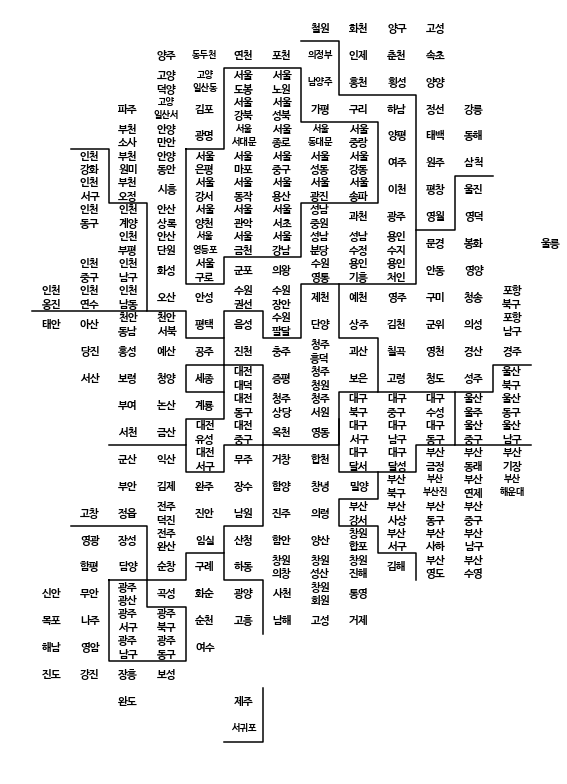

In [32]:
plt.figure(figsize=(8,11))

#지역이름 표시하기

for idx,row in draw_korea.iterrows():
    
    #광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
    #(중구,서구)

    if len(row['ID'].split()) == 2:
        
        dispname='{}\n{}'.format(row['ID'].split()[0],row['ID'].split()[1])
    
    elif row['ID'][:2]=='고성':
        
        dispname='고성'
    
    else:
        
        dispname= row['ID']

    #서대문구, 서귀포시 같이 이름이 3자 이상인 경우 작은 글자로 표시

    if len(dispname.splitlines()[-1]) >= 3:
        
        fontsize, linespacing = 9.5, 1.5
    else:
        
        fontsize, linespacing = 11,1.2
    
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center',linespacing=linespacing)
    
#시도 경계 그리기

for path in BORDER_LINES:
    
    ys,xs=zip(*path)

    plt.plot(xs,ys,c='black',lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [33]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    
    pop = pop.drop(pop[pop['ID'] == tmp].index)

print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()

set()


set()

In [34]:
#ID, 지역별 좌표 획득

pop = pd.merge(pop,draw_korea,how='left',on=['ID'])

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [35]:
#목표로하는 인구수합계를 각 위치에 이동시키기

mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [36]:
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48013.0,26264.0,24010.0,30114.0,NaN,NaN,NaN
1,NaN,NaN,NaN,205513.0,98277.0,45907.0,154763.0,438457.0,32720.0,280707.0,81793.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662154.0,70076.0,45991.0,27218.0,NaN,NaN,NaN
3,NaN,NaN,430781.0,NaN,363443.0,NaN,NaN,62448.0,193763.0,211101.0,38718.0,213846.0,NaN,NaN
4,NaN,NaN,NaN,NaN,339484.0,NaN,NaN,NaN,NaN,111367.0,47070.0,93297.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111563.0,337979.0,69599.0,NaN,NaN
6,NaN,NaN,NaN,402888.0,NaN,NaN,NaN,NaN,NaN,210359.0,43318.0,51738.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63778.0,327723.0,40073.0,39052.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74702.0,33539.0,NaN,10001.0


In [37]:
masked_mapdata

masked_array(
  data=[[--, --, --, --, --, --, --, 48013.0, 26264.0, 24010.0, 30114.0,
         --, --, --],
        [--, --, --, 205513.0, 98277.0, 45907.0, 154763.0, 438457.0,
         32720.0, 280707.0, 81793.0, --, --, --],
        [--, --, --, --, --, --, --, 662154.0, 70076.0, 45991.0, 27218.0,
         --, --, --],
        [--, --, 430781.0, --, 363443.0, --, --, 62448.0, 193763.0,
         211101.0, 38718.0, 213846.0, --, --],
        [--, --, --, --, 339484.0, --, --, --, --, 111367.0, 47070.0,
         93297.0, --, --],
        [--, --, --, --, --, --, --, --, --, 111563.0, 337979.0, 69599.0,
         --, --],
        [--, --, --, 402888.0, --, --, --, --, --, 210359.0, 43318.0,
         51738.0, --, --],
        [--, --, --, --, --, --, --, --, 63778.0, 327723.0, 40073.0,
         39052.0, --, --],
        [--, --, --, --, --, --, --, --, --, --, 74702.0, 33539.0, --,
         10001.0],
        [--, --, --, 640890.0, --, 284890.0, 156763.0, --, --, --,
         168798.0, 177

지도 그리기 위한 함수 작성

In [38]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

인구 현황 및 인구 소멸지역 확인

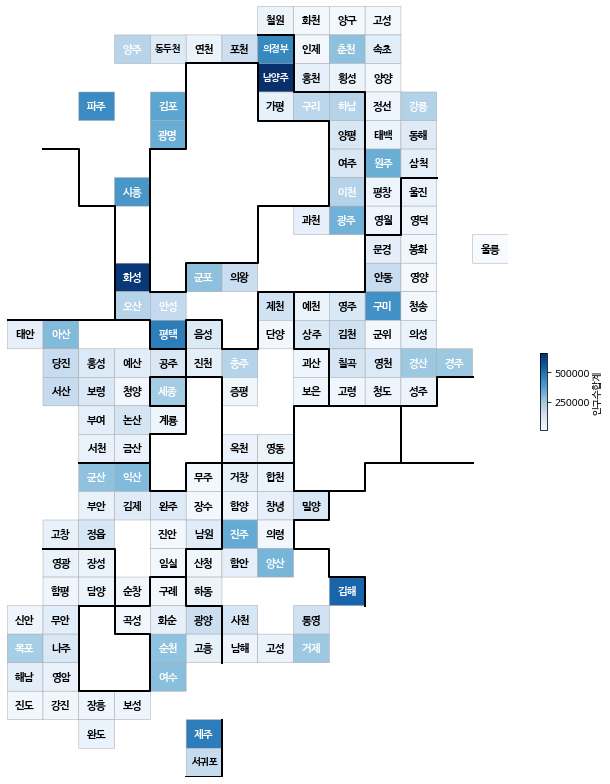

In [39]:
drawKorea('인구수합계',pop, 'Blues') #왜인지는 모르겠지만;; 이상한데

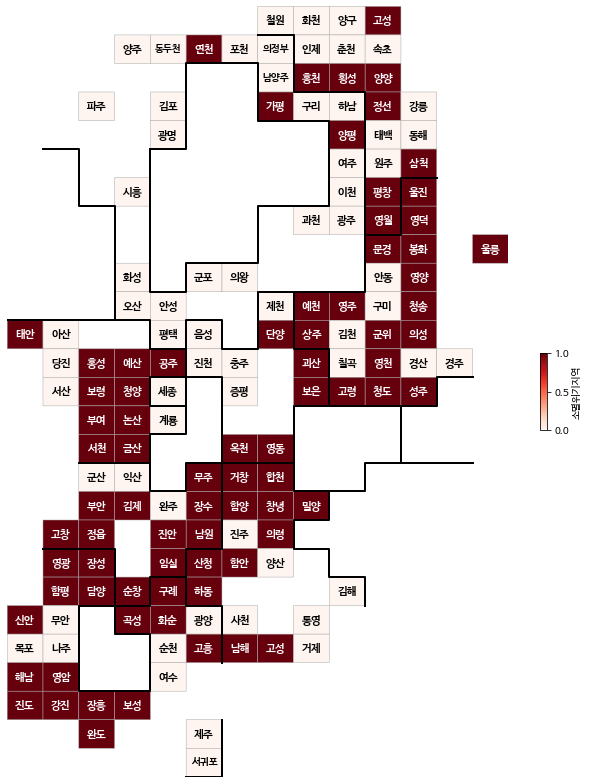

In [40]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]

drawKorea('소멸위기지역',pop,'Reds')

# 3. 여성인구 비율 확인

인구 소멸 위기 지역 이야기 나오기 전에 여성 인구가 너무 줄어들어 남녀 비율의 불균형이 심하다는 말이 많이 나왔다

In [43]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

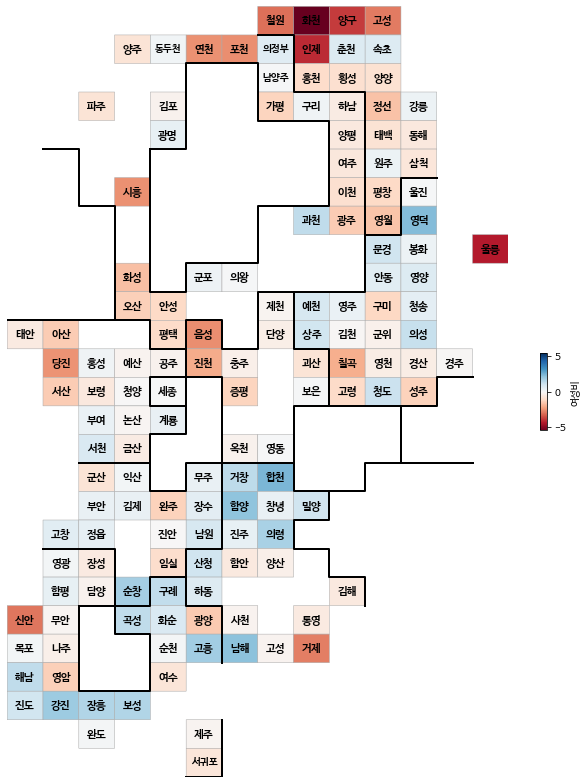

In [44]:
#여성비가 전체적으로 비슷해보이긴함

pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

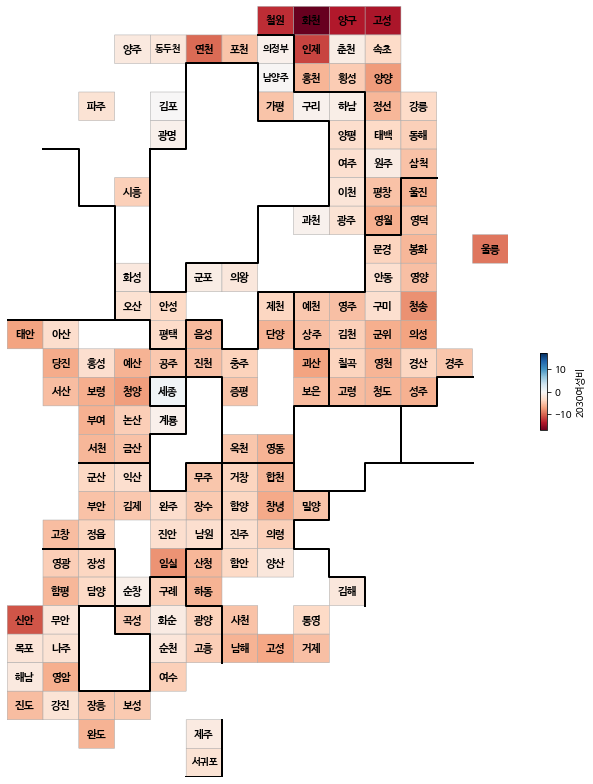

In [45]:
#2030여성비는 높은 지역이 거의 없는정도

pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5)*100

drawKorea('2030여성비',pop, 'RdBu')

# 4. Folium으로 인구 소멸 위기 지역 표현

In [46]:
pop_folium = pop.set_index('ID') #'ID'를 인덱스로 설정해서 folium이 인식하기 쉽도록 
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


In [60]:
import folium
import json
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [66]:
geo_path = '../content/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [69]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [62]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [65]:
#세이브

draw_korea.to_csv('output.csv',encoding='utf-8',sep=',')